In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('autoru_cleaned.csv')

In [3]:
cars.head()

,km_age,mark,model,power,segment,state,transmission,year,engine_type,region,body_type,color,drive_type,wheell_type,condition,owners_count,customs_cleared,price
0,60000,KIA,OPTIMA,188,MEDIUM,used,AUTOMATIC,2018,GASOLINE,Зеленоград,седан,синий,передний,Левый,Не требует ремонта,1 владелец,Растаможен,1600000
1,74000,AUDI,A4,170,PREMIUM,used,VARIATOR,2012,GASOLINE,Москва,седан,белый,передний,Левый,Не требует ремонта,3 или более,Растаможен,1040000
2,39900,GAZ,21,75,MEDIUM,used,MECHANICAL,1970,GASOLINE,Москва,седан,серый,задний,Левый,Не требует ремонта,2 владельца,Растаможен,390000
3,120000,TOYOTA,VENZA,185,MEDIUM,used,AUTOMATIC,2013,GASOLINE,Москва,внедорожник 5 дв.,белый,полный,Левый,Не требует ремонта,2 владельца,Растаможен,1575000
4,453844,MERCEDES,G_KLASSE,215,PREMIUM,used,AUTOMATIC,2000,GASOLINE,Москва,внедорожник 5 дв.,чёрный,полный,Левый,Не требует ремонта,3 или более,Растаможен,1098000


#### У меня есть несколько гипотез, которые я бы хотел проверить.
1. Новые автомобили стоят больше, чем подерженные.
2. Чем больше лошадинные сил, тем больше цена.
3. Премиум сегмент, дороже остальных.
4. Чем больше владелецев, тем дешевле цена.
5. Чем старше автомобиль, тем он дешевле.

### 1. Новые автомобили стоят больше, чем подерженные.

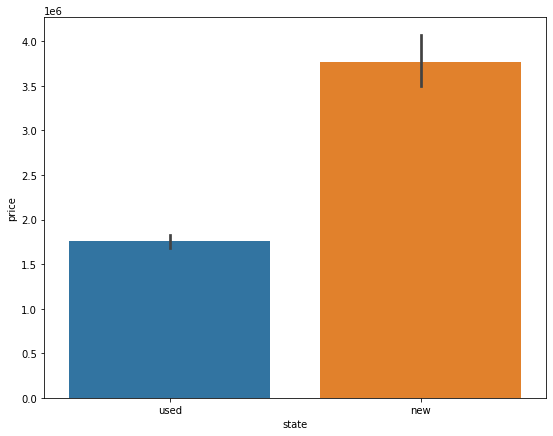

In [4]:
plt.figure(figsize=(9,7))
sns.barplot(x='state', y='price', data=cars);

**Вывод:** Гипотеза подтвердилась.

### 2. Чем больше лошадинные сил, тем больше цена.

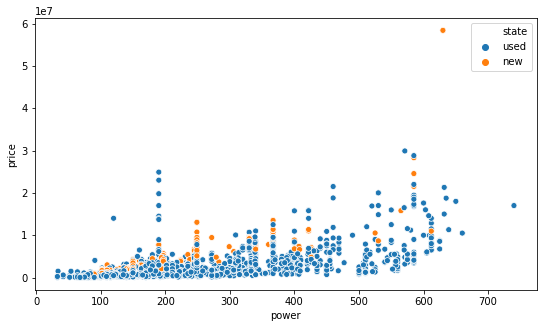

In [5]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='power', y='price', hue='state', data=cars);

<AxesSubplot:xlabel='power', ylabel='price'>

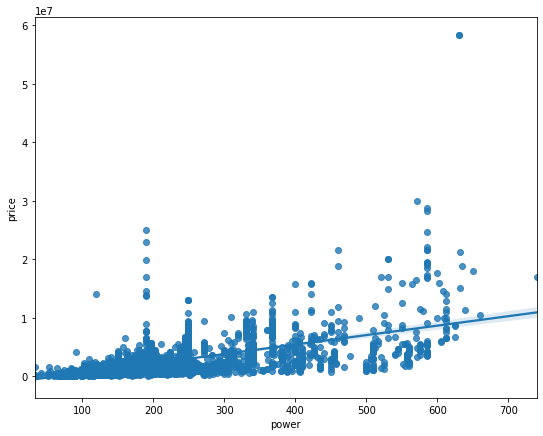

In [6]:
plt.figure(figsize=(9,7))
sns.regplot(x='power', y='price', data=cars)

**Вывод:** Гипотеза подтвердилась, виден тренд.

### 3. Премиум сегмент, дороже остальных.

In [151]:
def cat_plots(order, feature, nrows=1, ncols=3, figsize=(15, 9)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.suptitle(f'{feature.capitalize()} exploration')
    segment_countplot = sns.countplot(ax=axes[0], y=feature, data=cars, 
                 order=order);
    segment_countplot.set_title(f'Countplot of `{feature}`')

    segment_countplot = sns.barplot(ax=axes[1], x=feature, y='price', data=cars, 
               order=order);
    segment_countplot.set_title(f'Impact `{feature}` of `price`')

    segment_countplot = sns.boxplot(ax=axes[2], x=feature, y='price', data=cars, 
               order=order);
    segment_countplot.set_title('Outliers check');

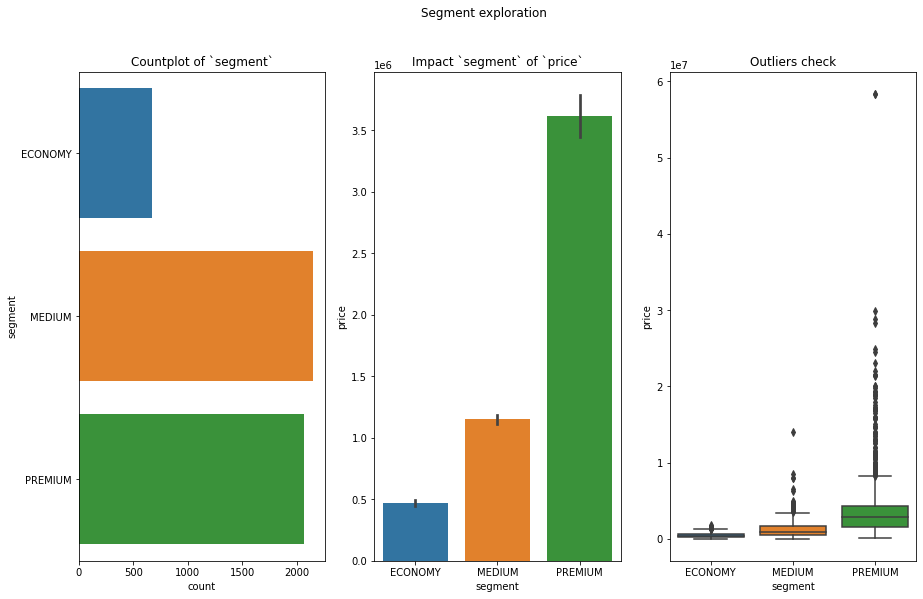

In [152]:
cat_plots(order=['ECONOMY', 'MEDIUM', 'PREMIUM'], feature='segment')

**Вывод:** Гипотеза подтвердилась. И также у категории `PREMIUM` много выбросов.

### 4. Чем больше владелецев, тем дешевле цена.

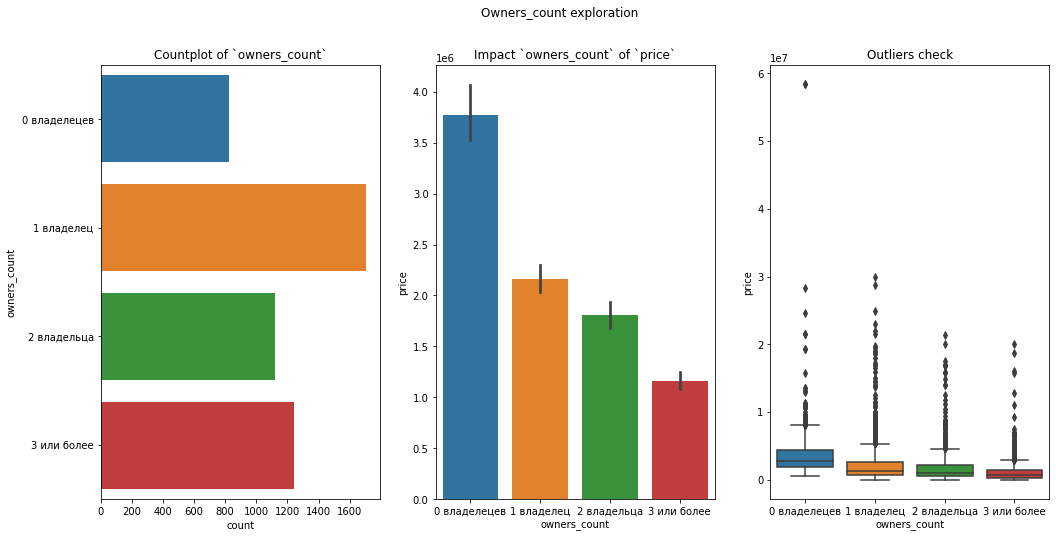

In [154]:
cat_plots(order=["0 владелецев", "1\xa0владелец", "2\xa0владельца", "3 или более"], feature='owners_count', figsize=(17, 8))

**Вывод:** Гипотеза подтвердилась.

### 5. Чем старше автомобиль, тем он дешевле.

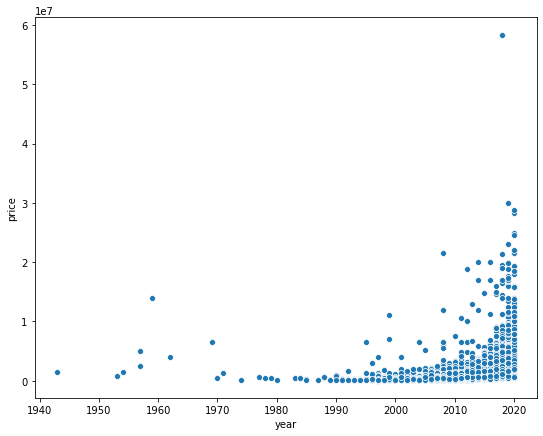

In [11]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=cars, x='year', y='price');

Попробую вывести ценовой сегмент.

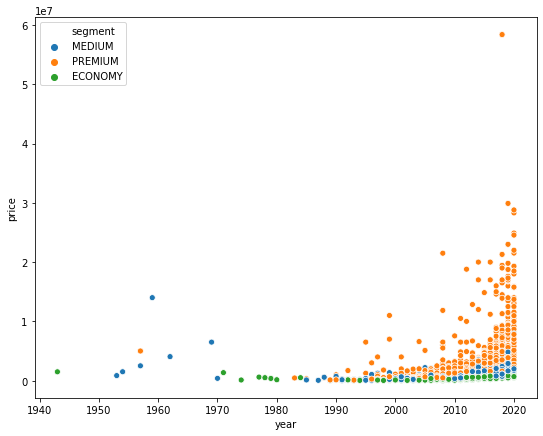

In [12]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=cars, x='year', y='price', hue='segment');

**Вывод:** Гипотеза подтвердилась. 

#### Первичные итоги:
1. Новые автомобили стоят больше, чем подерженные. $\color{green}{\text{CORRECT}}$
2. Чем больше лошадинные сил, тем больше цена. $\color{green}{\text{CORRECT}}$
3. Премиум сегмент, дороже остальных. $\color{green}{\text{CORRECT}}$
4. Чем больше владелецев, тем дешевле цена. $\color{green}{\text{CORRECT}}$
5. Чем старше автомобиль, тем он дешевле. $\color{green}{\text{CORRECT}}$

### Посмотрим на другие фичи, попробуем отрыть инсайты.

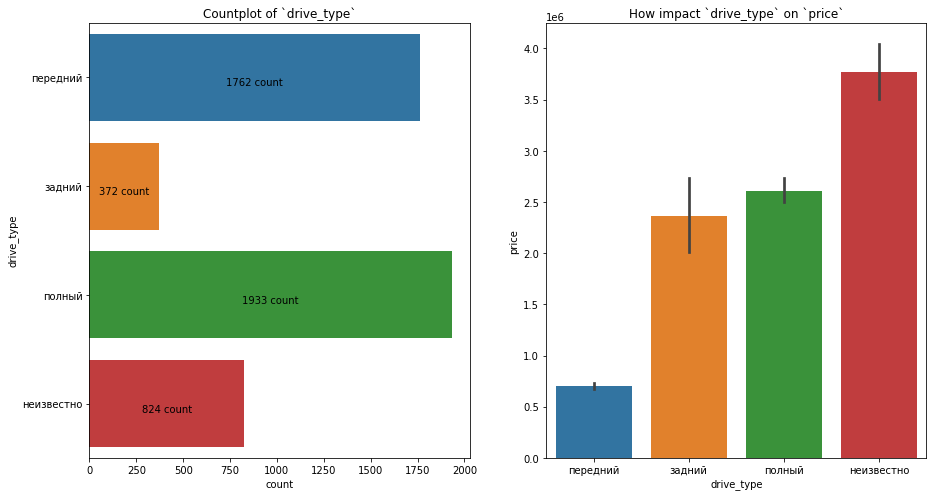

In [133]:
# plt.figure(figsize=(9,7))
# sns.barplot(data=cars, x='drive_type', y='price');

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
countplot = sns.countplot(ax=axes[0], y='drive_type', data=cars);
countplot.set_title('Countplot of `drive_type`')
barplot = sns.barplot(ax=axes[1], data=cars, x='drive_type', y='price');
barplot.set_title('How impact `drive_type` on `price`')
for p in countplot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    width = p.get_width()
    countplot.annotate(f'{width} count', (x.mean(), (y - 0.35)), ha='center', va='center')

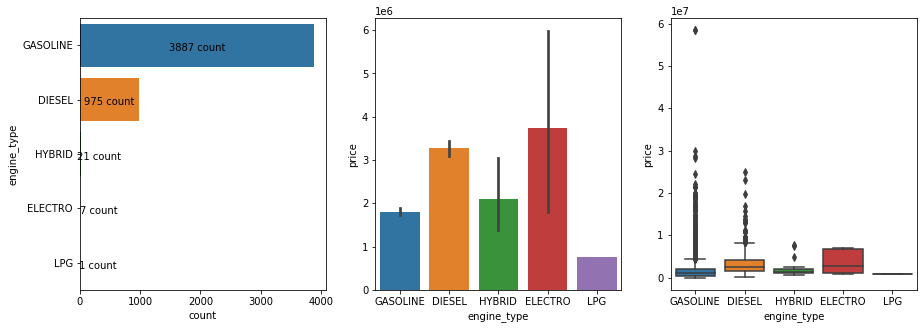

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
countplot = sns.countplot(ax=axes[0], y='engine_type', data=cars);
sns.barplot(ax=axes[1], data=cars, x='engine_type', y='price');
sns.boxplot(ax=axes[2], data=cars, x='engine_type', y='price');
for p in countplot.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    width = p.get_width()
    if width > 900:
        countplot.annotate(f'{width} count', (x.mean(), (y - 0.35)), ha='center', va='center')
    else:
        countplot.annotate(f'{width} count', (x.max() + 300, (y - 0.35)), ha='center', va='center')

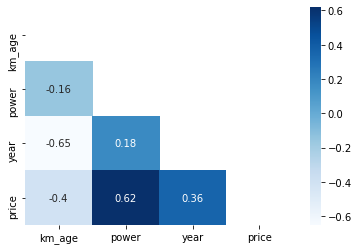

In [16]:
corr = cars.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues');